# Records

## Bibliotecas

In [10]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
import numpy as np

## ETL

In [14]:
df = pd.read_csv('RECORDS.csv')
df.head()

,title,release_year,artists,genres,styles,region
0,Stockholm,1999.0,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998.0,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999.0,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999.0,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995.0,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14609075 entries, 0 to 14609074
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   title         object 
 1   release_year  float64
 2   artists       object 
 3   genres        object 
 4   styles        object 
 5   region        object 
dtypes: float64(1), object(5)
memory usage: 668.8+ MB


In [16]:
df['release_year'] = df['release_year'].astype('Int64')
for c in ['artists', 'genres', 'styles', 'region']:
    df[c] = df[c].astype('category')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14609075 entries, 0 to 14609074
Data columns (total 6 columns):
 #   Column        Dtype   
---  ------        -----   
 0   title         object  
 1   release_year  Int64   
 2   artists       category
 3   genres        category
 4   styles        category
 5   region        category
dtypes: Int64(1), category(4), object(1)
memory usage: 581.6+ MB


In [18]:
df.head()

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany


In [19]:
df['release_year'] = df['release_year'].fillna(0)

In [20]:
df = df[df['release_year'].astype(str).str.len() == 4]


In [21]:
df.reset_index(drop=True)

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany
...,...,...,...,...,...,...
12612912,Distances,2023,Whalespruce,Electronic,Drum n Bass,Spain
12612913,Where Do We Go Now,2025,Atmozfears; Caelum (6),Electronic,Hardstyle,Netherlands
12612914,Cult of the Lamb: Hymns of the Unholy,2025,Pick Up Goliath,Rock,Melodic Death Metal|Metalcore,UK
12612915,Society,2023,Tong8,Electronic,Drum n Bass,Spain


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12612917 entries, 0 to 14609074
Data columns (total 6 columns):
 #   Column        Dtype   
---  ------        -----   
 0   title         object  
 1   release_year  Int64   
 2   artists       category
 3   genres        category
 4   styles        category
 5   region        category
dtypes: Int64(1), category(4), object(1)
memory usage: 622.6+ MB


## Questões

### Fáceis

Quantos registros únicos existem na base?

In [23]:
df.head()

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany


In [24]:
df['title'].count()

np.int64(12612730)

Liste todas as regiões (region) presentes e qual tem mais registros.

,region,title
0,US,2683214
1,UK,1366140
2,Germany,959760
3,Japan,665743
4,France,580664


Exiba o ano de lançamento mais antigo e o mais recente dos álbuns.

In [32]:
df.groupby('region',observed=False)['title'].count().reset_index().sort_values('title',ascending=False).reset_index(drop=True).head()
df.sort_values('release_year',ascending=False)

,title,release_year,artists,genres,styles,region
14609013,Atypowy,2025,Szpaku (3),Hip Hop,NaN,Poland
14511303,La Rosa Azul,2025,Talking Blue,Electronic,Euro-Disco,Spain
14608998,TEENAGE,2025,Bradford Cox,Electronic,Ambient|Experimental,Japan
14392856,Nocturnal Will,2025,Dödsrit,Rock,Black Metal|Atmospheric Black Metal|Crust,Worldwide
14608894,Te Quero Perto,2025,Millos Kaiser,Electronic,Nu-Disco|House,Australia
...,...,...,...,...,...,...
13153243,Whistling,1888,Alice J. Shaw,Non-Music,NaN,NaN
10509983,Mary Had A Little Lamb,1888,Emile Berliner,Children's,Nursery Rhymes,Germany
4156538,Experimental Talking Clock,1878,Frank Lambert (2),Non-Music,Experimental|Technical|Speech,US
6011214,Mary Had A Little Lamb,1878,Thomas Alva Edison,Children's,Nursery Rhymes|Experimental,US


In [33]:
print('A música mais antiga é ',df.sort_values('release_year',ascending=False)['title'].iloc[-1],',do ano de ',df.sort_values('release_year',ascending=False)['release_year'].iloc[-1])
print('A música mais nova é ',df.sort_values('release_year',ascending=False)['title'].iloc[0],',do ano de ',df.sort_values('release_year',ascending=False)['release_year'].iloc[0])

A música mais antiga é  Au Clair De La Lune ,do ano de  1860
A música mais nova é  Atypowy ,do ano de  2025


Há algum valor ausente (NaN)? Em quais colunas e quantos valores faltam em cada uma?

In [34]:
df.isna().sum()

title               187
release_year          0
artists               2
genres                0
styles          1959964
region           402024
dtype: int64

### Intermediárias

Quais são os 10 artistas mais frequentes na base?

In [45]:
df.groupby('artists',observed= True)['title'].count().reset_index().sort_values('title', ascending=False).reset_index(drop=True).head(10)

,artists,title
0,Various,951357
1,Unknown Artist,34909
2,Elvis Presley,15832
3,The Beatles,15566
4,The Rolling Stones,13246
5,No Artist,10471
6,David Bowie,7403
7,Frank Sinatra,7154
8,Pink Floyd,6867
9,Bob Dylan,6706


Liste todos os gêneros (genres) únicos encontrados — cuidado com múltiplos valores separados por “|”.

In [81]:
df_sem_pipe = df[~df['genres'].str.contains(r'\|', na=False)]
df_sem_pipe

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany
...,...,...,...,...,...,...
14609068,Middle Of Nowhere,2025,Wandering Dog,Electronic,Ambient|Dark Ambient|Experimental,Croatia
14609069,Distances,2023,Whalespruce,Electronic,Drum n Bass,Spain
14609070,Where Do We Go Now,2025,Atmozfears; Caelum (6),Electronic,Hardstyle,Netherlands
14609071,Cult of the Lamb: Hymns of the Unholy,2025,Pick Up Goliath,Rock,Melodic Death Metal|Metalcore,UK


In [85]:
df_sem_pipe.groupby('genres',observed=True)['title'].count().reset_index().sort_values('title',ascending= False).reset_index(drop=True)

,genres,title
0,Electronic,2579709
1,Rock,2553995
2,Pop,892702
3,"Folk, World, & Country",792996
4,Classical,572515
5,Jazz,492890
6,Hip Hop,412609
7,Funk / Soul,311495
8,Latin,209906
9,Reggae,174069


Crie um ranking dos 5 estilos (styles) mais populares nos anos 1990.

In [ ]:
df[(df['release_year']>1990) & (df['release_year']<2000)].groupby('styles',observed= False)['title'].count().reset_index().sort_values('title',ascending=False).reset_index(drop=True).head()

,styles,title
0,House,32284
1,Pop Rock,29523
2,Alternative Rock,26638
3,Punk,22411
4,Euro House,19780


8. Conte quantos álbuns a região "US" lançou entre 2000 e 2010.

In [96]:
df[(df['release_year']>2000) & (df['release_year']<2010) & (df['region']=='US')]['title'].count()

np.int64(472653)

### Avançado

Exploda a coluna genres em linhas (cada linha para um gênero de um álbum), conte quantas vezes cada gênero
aparece, e encontre o top 10 geral.

In [97]:
df.head()

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany


In [160]:
df['genres_list'] = df['genres'].str.split('|')
df_exploded = df.explode('genres_list')
df_exploded


,title,release_year,artists,genres,styles,region,genres_list,styles_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,Electronic,[Deep House]
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,Electronic,"[Broken Beat, Techno, Tech House]"
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,Electronic,"[Techno, Tech House]"
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,Electronic,"[House, Deep House]"
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,Electronic,"[Abstract, Ambient, Downtempo]"
...,...,...,...,...,...,...,...,...
14609070,Where Do We Go Now,2025,Atmozfears; Caelum (6),Electronic,Hardstyle,Netherlands,Electronic,[Hardstyle]
14609071,Cult of the Lamb: Hymns of the Unholy,2025,Pick Up Goliath,Rock,Melodic Death Metal|Metalcore,UK,Rock,"[Melodic Death Metal, Metalcore]"
14609072,Society,2023,Tong8,Electronic,Drum n Bass,Spain,Electronic,[Drum n Bass]
14609074,Piano Bar,2002,Patricia Kaas,Jazz|Stage & Screen,Smooth Jazz|Easy Listening,Brazil,Jazz,"[Smooth Jazz, Easy Listening]"


In [105]:
df_exploded.groupby('genres_list')['title'].count().reset_index().sort_values('title',ascending=False).reset_index(drop=True).head(10)

,genres_list,title
0,Rock,4046997
1,Electronic,3596673
2,Pop,2609188
3,"Folk, World, & Country",1547593
4,Jazz,999225
5,Funk / Soul,835916
6,Classical,753438
7,Hip Hop,686228
8,Latin,538063
9,Stage & Screen,387041


Qual artista aparece com mais estilos diferentes ao longo da base?

In [106]:
df.head()

,title,release_year,artists,genres,styles,region,genres_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,[Electronic]
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic]
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,[Electronic]
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,[Electronic]
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,[Electronic]


In [107]:
df['styles_list'] = df['styles'].str.split('|')
df_exploded = df.explode('styles_list')
df_exploded


,title,release_year,artists,genres,styles,region,genres_list,styles_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,[Electronic],Deep House
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],Broken Beat
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],Techno
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],Tech House
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,[Electronic],Techno
...,...,...,...,...,...,...,...,...
14609071,Cult of the Lamb: Hymns of the Unholy,2025,Pick Up Goliath,Rock,Melodic Death Metal|Metalcore,UK,[Rock],Melodic Death Metal
14609071,Cult of the Lamb: Hymns of the Unholy,2025,Pick Up Goliath,Rock,Melodic Death Metal|Metalcore,UK,[Rock],Metalcore
14609072,Society,2023,Tong8,Electronic,Drum n Bass,Spain,[Electronic],Drum n Bass
14609074,Piano Bar,2002,Patricia Kaas,Jazz|Stage & Screen,Smooth Jazz|Easy Listening,Brazil,"[Jazz, Stage & Screen]",Smooth Jazz


In [113]:
df_exploded.groupby('artists',observed=False)['styles_list'].nunique().reset_index().sort_values('styles_list',ascending=False)

,artists,styles_list
3111648,Various,690
3092144,Unknown Artist,502
2098670,No Artist,277
3288570,various,247
1812562,Madonna,139
...,...,...
26,!Caramba!,0
25,!CKS,0
20,!Andale!,0
19,!Akimbo,0


Existe algum estilo que só aparece em uma única região? Liste esses estilos “exclusivos” com sua respectiva
região.

In [128]:
estilo_regional = df_exploded.groupby('styles_list')['region'].count().reset_index().sort_values('region')[df_exploded.groupby('styles_list')['region'].count().reset_index().sort_values('region')['region']==1]

In [137]:
df_exploded[df_exploded['styles_list'].isin(estilo_regional['styles_list'])][['styles_list','region']]

,styles_list,region
2682682,Bećarac,US
9303034,Kaskawi,Netherlands
10809795,Bultrón,Panama
13190572,Khaliji,UK


Mostre um gráfico de barras com a evolução do número de álbuns lançados por década (ex: anos 1980, 1990,
2000, 2010, 2020).

In [138]:
df.head()

,title,release_year,artists,genres,styles,region,genres_list,styles_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,[Electronic],[Deep House]
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],"[Broken Beat, Techno, Tech House]"
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,[Electronic],"[Techno, Tech House]"
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,[Electronic],"[House, Deep House]"
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,[Electronic],"[Abstract, Ambient, Downtempo]"


In [140]:
df[(df['release_year']>=1980) & (df['release_year']<1990)]['title'].count()

np.int64(1240645)

In [147]:
anos = [1980,1990,2000,2010,2020,2030]
resultado = []

for i in range(len(anos)-1):
    a = anos[i]
    b = anos[i+1]
    conta = df[(df['release_year']>=a) & (df['release_year']<b)]['title'].count()
    resultado.append({'anos':anos[i],'quantidade':conta})
resultado = pd.DataFrame(resultado)
resultado

,anos,quantidade
0,1980,1372782
1,1990,1954228
2,2000,2497465
3,2010,2989846
4,2020,1418693


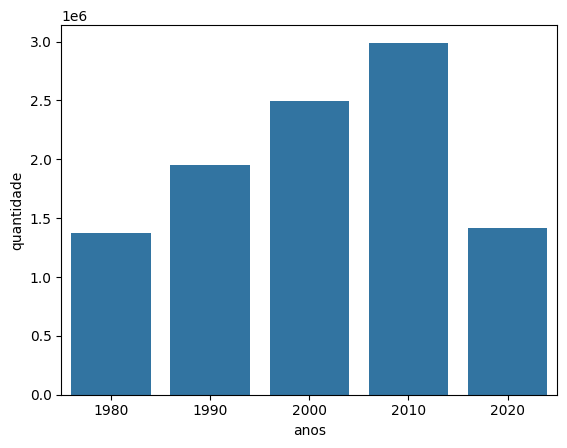

In [158]:
sns.barplot(x='anos', y='quantidade', data=resultado)
plt.savefig('records vs anos.png')
plt.show()

### Avançado+

Para cada região, quem são os 3 gêneros mais comuns? Monte uma tabela resumo.

In [178]:
regiao_genero = df_exploded.groupby(['region','genres_list'],observed= True)['title'].count().reset_index().sort_values(['region','title'],ascending=[True,False])
regioes = list(regiao_genero['region'].unique())

resultado = []
for r in regioes:
    for i in range(3):
        try:
            resultado.append(regiao_genero[regiao_genero['region']==r].iloc[i])
        except IndexError:  
            pass
resultado = pd.DataFrame(resultado)
resultado

,region,genres_list,title
1,Abkhazia,"Folk, World, & Country",5
3,Abkhazia,Rock,4
0,Abkhazia,Electronic,1
6,Afghanistan,"Folk, World, & Country",68
8,Afghanistan,Pop,11
...,...,...,...
3288,Zambia,Funk / Soul,198
3297,Zanzibar,Electronic,1
3303,Zimbabwe,"Folk, World, & Country",1356
3311,Zimbabwe,Rock,866


Quais são os 5 pares de artista + gênero mais recorrentes na base, considerando a explosão dos campos?

In [179]:
df_exploded.head()

,title,release_year,artists,genres,styles,region,genres_list,styles_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,Electronic,[Deep House]
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,Electronic,"[Broken Beat, Techno, Tech House]"
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,Electronic,"[Techno, Tech House]"
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,Electronic,"[House, Deep House]"
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,Electronic,"[Abstract, Ambient, Downtempo]"


In [186]:
df_exploded.groupby(['artists','genres_list'],observed=True)['title'].count().reset_index().sort_values(['title'],ascending=False).head()

,artists,genres_list,title
3985850,Various,Electronic,362153
3985859,Various,Rock,297742
3985857,Various,Pop,287323
3985851,Various,"Folk, World, & Country",151041
3985852,Various,Funk / Soul,104251


Existe correlação visual entre o crescimento da diversidade de estilos e o número de regiões participantes?
Monte um gráfico cruzando essa relação por ano.

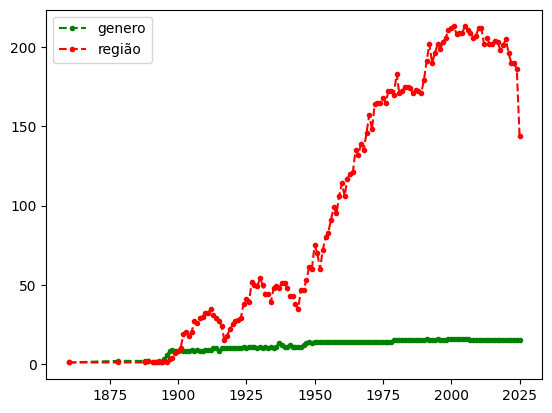

In [199]:
ano_genero = df_exploded.groupby('release_year',observed= True)['genres_list'].nunique().reset_index()
ano_regiao = df_exploded.groupby('release_year',observed= True)['region'].nunique().reset_index()

plt.plot(ano_genero['release_year'],
         ano_genero['genres_list'],
         'g.--',label=('genero'))
plt.plot(ano_regiao['release_year'],
         ano_regiao['region'],
         'r.--',label=('região'))
plt.legend()
plt.savefig('região e genero.png')
plt.show()

Qual década teve mais diversidade de estilos diferentes? E de gêneros diferentes

In [9]:
df.head()

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany


In [13]:
df['genres_list'] = df['genres'].str.split('|')
df_genero = df.explode('genres_list')
df_genero.head()

,title,release_year,artists,genres,styles,region,genres_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,Electronic
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,Electronic
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,Electronic
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,Electronic
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,Electronic


In [14]:
df['styles_list'] = df['styles'].str.split('|')
df_estilo = df.explode('styles_list')
df_estilo.head()

,title,release_year,artists,genres,styles,region,genres_list,styles_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,[Electronic],Deep House
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],Broken Beat
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],Techno
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,[Electronic],Tech House
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,[Electronic],Techno


In [15]:
ano_genero = df_genero.groupby('release_year',observed= True)['genres_list'].nunique().reset_index()
ano_estilo = df_estilo.groupby('release_year',observed= True)['styles_list'].nunique().reset_index()

resultado = []
anos = []

for i in range(ano_genero['release_year'].iloc[0],ano_genero['release_year'].iloc[-1]+10,10):
    anos.append(i)

In [16]:
ano_estilo

,release_year,styles_list
0,1860,2
1,1878,4
2,1888,1
3,1889,1
4,1891,0
...,...,...
134,2021,648
135,2022,653
136,2023,655
137,2024,647


In [17]:
ano_genero

,release_year,genres_list
0,1860,1
1,1878,2
2,1888,2
3,1889,2
4,1891,1
...,...,...
134,2021,15
135,2022,15
136,2023,15
137,2024,15


In [18]:
for i in range(len(anos)-1):
    a = anos[i]
    b = anos[i+1]
    soma_g = ano_genero[(ano_genero['release_year']>=a) & (ano_genero['release_year']<b)]['genres_list'].sum()
    soma_e = ano_estilo[(ano_estilo['release_year']>=a) & (ano_estilo['release_year']<b)]['styles_list'].sum()
    resultado.append({'década':anos[i],
                      'generos':soma_g,
                      'estilos':soma_e})
resultado = pd.DataFrame(resultado)
resultado

,década,generos,estilos
0,1860,1,2
1,1870,2,4
2,1880,4,2
3,1890,39,74
4,1900,83,433
5,1910,95,700
6,1920,104,1008
7,1930,110,1296
8,1940,119,1486
9,1950,140,2486


### Brabo


Encontre álbuns que foram lançados com o mesmo nome, mas por artistas diferentes, em anos diferentes.
Quantos “títulos repetidos” assim existem?

In [ ]:
df[(df.duplicated('title',keep=False)) & (~df.duplicated(['title','artists','release_year'],keep=False))].sort_values('title')

,title,release_year,artists,genres,styles,region
10975892,\tOne Dimensional / Datawipe / Underground Ana...,2021,Various,Electronic,Techno,UK
13362194,\tOne Dimensional / Datawipe / Underground Ana...,2023,Various,Electronic,Techno,UK
5513732,\tExtended Versions: The Encore Collection,2000,Jefferson Starship,Rock|Pop,Classic Rock|Psychedelic Rock,US
5415254,\tExtended Versions: The Encore Collection,2000,Humble Pie,Rock,Classic Rock,US
6031034,\tКонцерт Для Скрипки С Оркестром Ми Минор,1962,Jascha Heifetz; Felix Mendelssohn-Bartholdy,Classical,NaN,USSR
...,...,...,...,...,...,...
14249289,NaN,2005,Slim Beezy,Hip Hop,NaN,US
14445759,NaN,2010,Seii Taishogun; Nuclear Monstrosity; Taxidermi...,Electronic|Rock,Hardstyle|Goregrind,Austria
14459135,NaN,2024,THE SOLUTIONS; 솔루션스,Rock|Pop,NaN,South Korea
14482188,NaN,1996,Los Campos,Rock|Blues|Pop,NaN,Spain


In [47]:
df[(df.duplicated('title',keep=False)) & (~df.duplicated(['title','artists','release_year'],keep=False))].sort_values('title')['title'].nunique()

941473

Monte um heatmap mostrando a frequência cruzada entre as 10 regiões e os 10 gêneros mais populares
(precisa explodir a coluna genres).

In [15]:
df.head()

,title,release_year,artists,genres,styles,region
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany


In [17]:
df['genres_list'] = df['genres'].str.split('|')
df_genero = df.explode('genres_list')
df_genero.head()

,title,release_year,artists,genres,styles,region,genres_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,Electronic
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,Electronic
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,Electronic
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,Electronic
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,Electronic


In [20]:
df_genero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16949279 entries, 0 to 14609074
Data columns (total 7 columns):
 #   Column        Dtype   
---  ------        -----   
 0   title         object  
 1   release_year  Int64   
 2   artists       category
 3   genres        category
 4   styles        category
 5   region        category
 6   genres_list   object  
dtypes: Int64(1), category(4), object(2)
memory usage: 904.9+ MB


In [131]:
df_pivot = pd.pivot_table(
    df_genero,
    values = 'title',
    index = 'genres_list',
    columns= 'region',
    aggfunc= 'count',
    observed= True,
    fill_value=0    
)


In [133]:
df_pivot.head()

region,Abkhazia,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,...,Virgin Islands,Wallis and Futuna,West Bank,Worldwide,Yemen,Yugoslavia,Zaire,Zambia,Zanzibar,Zimbabwe
genres_list,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blues,0,0,2,2,8,0,20,15,0,0,...,0,0,0,868,0,472,0,12,0,15
Brass & Military,0,0,0,0,1,0,1,1,0,0,...,0,0,0,98,0,545,0,1,0,2
Children's,0,0,0,2,0,0,0,14,0,0,...,1,0,0,240,0,970,0,0,0,5
Classical,0,4,1,3,9,1,21,7,0,0,...,1,0,0,2630,0,2595,2,0,0,9


In [134]:
paises_10 = list(df_genero.groupby('region',observed=True)['title'].count()
                 .reset_index().sort_values('title',ascending=False).head(10)['region'])
paises_10

['US',
 'UK',
 'Germany',
 'Japan',
 'France',
 'Italy',
 'Europe',
 'Canada',
 'Spain',
 'Netherlands']

In [135]:
generos_10 = list(df_genero.groupby('genres_list',observed=True)['title'].count()
                  .reset_index().sort_values('title',ascending=False).head(10)['genres_list'])
generos_10

['Rock',
 'Electronic',
 'Pop',
 'Folk, World, & Country',
 'Jazz',
 'Funk / Soul',
 'Classical',
 'Hip Hop',
 'Latin',
 'Stage & Screen']

In [136]:
df_pivot = df_pivot.loc[df_pivot.index.isin(generos_10), df_pivot.columns.isin(paises_10)]
df_pivot

region,Canada,Europe,France,Germany,Italy,Japan,Netherlands,Spain,UK,US
genres_list,,,,,,,,,,
Classical,21677,68831,48110,89922,32202,32246,21732,21194,83413,132428
Electronic,84986,78347,159029,364187,209168,129229,162059,117707,594826,560987
"Folk, World, & Country",74777,32325,71179,67981,41796,41015,38743,51117,106529,390291
Funk / Soul,35342,32558,33771,37334,25446,58776,20300,18227,94502,260211
Hip Hop,18673,22205,34268,42138,13345,35676,10867,7463,49641,241762
Jazz,39663,41246,55628,66429,44198,101323,22067,24261,91794,267082
Latin,6408,9809,22221,11779,14884,13024,5403,53470,11789,80605
Pop,96711,94759,148375,169163,114688,183565,93590,89046,211438,382645
Rock,156637,165716,148358,279923,133247,266508,82042,111689,372493,924403


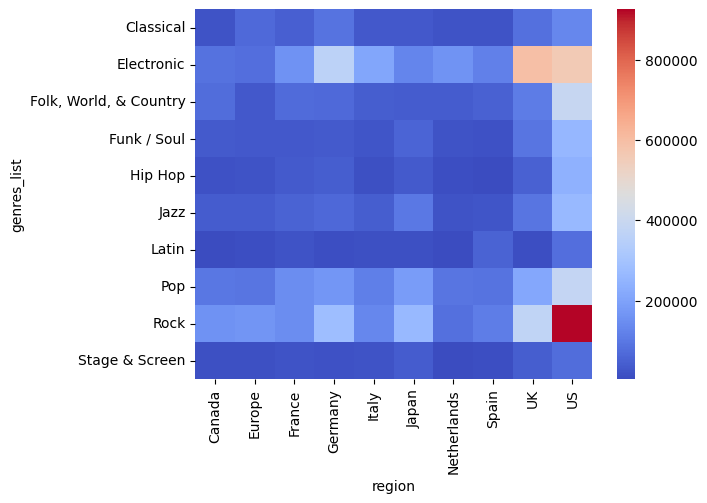

In [138]:
sns.heatmap(data=df_pivot,
            cmap='coolwarm')
plt.show()

Existe algum artista que aparece em mais de 5 regiões diferentes? Liste-os, mostrando que tipo de distribuição
global cada um tem.

In [89]:
artistas_região = df.groupby('artists',observed=False)['region'].nunique().reset_index().sort_values('region',ascending=True).tail()
artistas_região

,artists,region
1937075,Michael Jackson,113
2937006,The Rolling Stones,116
2810314,The Beatles,116
3092144,Unknown Artist,165
3111648,Various,240


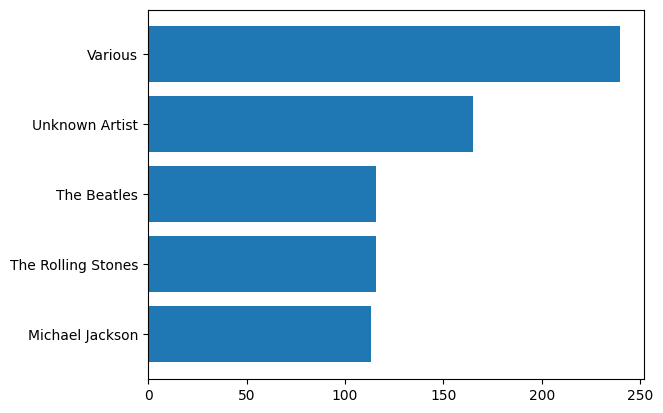

In [90]:
plt.barh(artistas_região['artists'],
        artistas_região['region'])

plt.show()

Para cada ano, descubra quais estilos surgiram pela primeira vez na base, criando uma linha do tempo de
“estreias de estilos”.

In [101]:
ano_estilo = df_estilo[['release_year','styles_list']].sort_values('release_year').dropna().reset_index(drop=True)
ano_estilo

,release_year,styles_list
0,1860,Experimental
1,1860,Nursery Rhymes
2,1878,Experimental
3,1878,Technical
4,1878,Speech
...,...,...
19090581,2025,Hardstyle
19090582,2025,Hardstyle
19090583,2025,Dark Ambient
19090584,2025,Hardstyle


In [113]:
segundinha = ano_estilo[ano_estilo.duplicated('styles_list')]
list(segundinha.index)

[2,
 5,
 6,
 7,
 9,
 11,
 13,
 17,
 18,
 19,
 20,
 23,
 24,
 26,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 102,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 2

In [117]:
ano_estilo_novo = ano_estilo.drop(index=list(segundinha.index)).reset_index(drop=True)
ano_estilo_novo.head()

,release_year,styles_list
0,1860,Experimental
1,1860,Nursery Rhymes
2,1878,Technical
3,1878,Speech
4,1889,Poetry


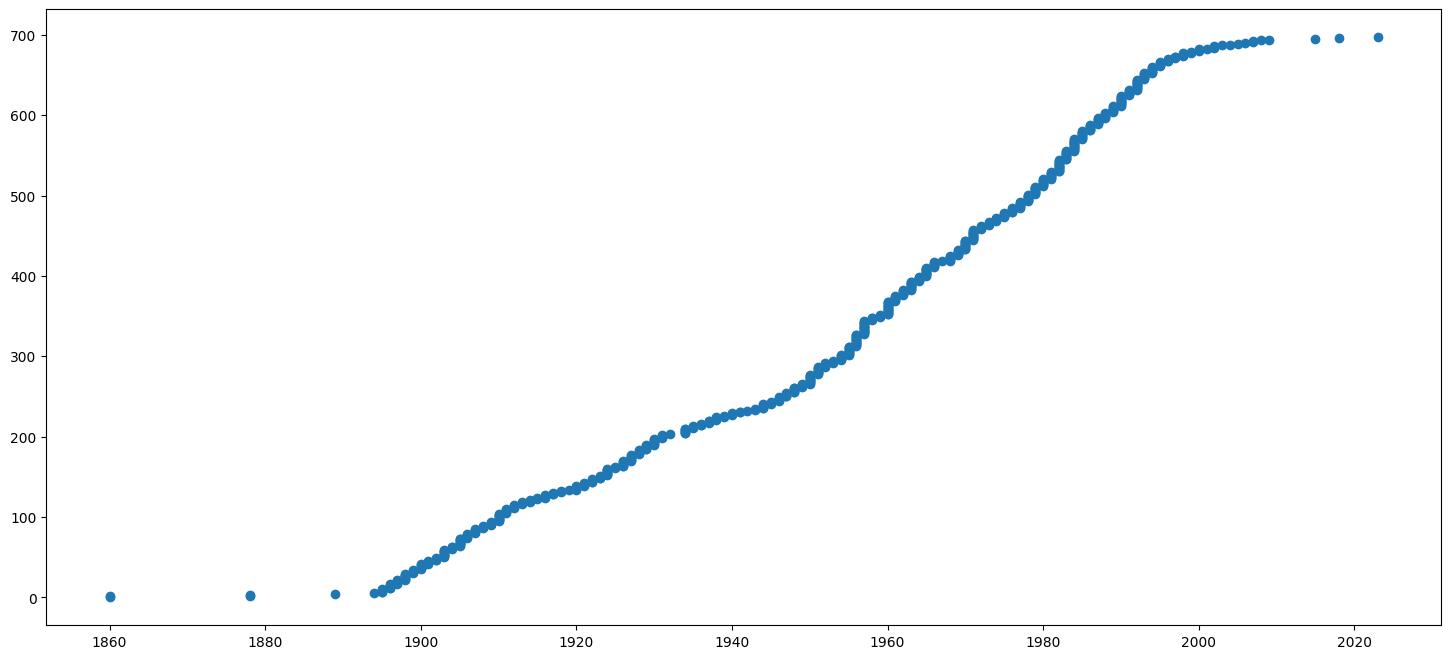

In [123]:
plt.figure(figsize=(18,8))

plt.scatter(ano_estilo_novo['release_year'],
            ano_estilo_novo.index,)
plt.show()

### Brabo +

Implemente a detecção de tendências: Qual gênero mais cresceu em popularidade em termos relativos
(variação percentual) de uma década para outra?

In [13]:
df['genres_list'] = df['genres'].str.split('|')
df_genero = df.explode('genres_list')
df_genero.head()

,title,release_year,artists,genres,styles,region,genres_list
0,Stockholm,1999,The Persuader,Electronic,Deep House,Sweden,Electronic
1,Knockin' Boots (Vol 2 Of 2),1998,Mr. James Barth & A.D.,Electronic,Broken Beat|Techno|Tech House,Sweden,Electronic
2,Profound Sounds Vol. 1,1999,Josh Wink,Electronic,Techno|Tech House,US,Electronic
3,Moving Cities,1999,Faze Action,Electronic,House|Deep House,US,Electronic
4,Flowerhead,1995,Datacide,Electronic,Abstract|Ambient|Downtempo,Germany,Electronic


In [23]:
ano_genero = df_genero[['release_year','genres_list']].sort_values('release_year').reset_index(drop=True)
ano_genero.head()

,release_year,genres_list
0,1860,Children's
1,1878,Children's
2,1878,Non-Music
3,1888,Non-Music
4,1888,Children's


In [50]:
anos = list(ano_genero['release_year'].unique())
decadas = []
for a in range(anos[0],anos[-1]+10,10):
    decadas.append(a)
decadas

[1860,
 1870,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010,
 2020,
 2030]

In [51]:
ano_genero['decada'] = None

for i in range(len(decadas)-1):
    a = decadas[i]
    b = decadas[i+1]
    v = (ano_genero['release_year'] >= a) & (ano_genero['release_year'] < b)
    ano_genero.loc[v, 'decada'] = a
ano_genero

,release_year,genres_list,decada
0,1860,Children's,1860
1,1878,Children's,1870
2,1878,Non-Music,1870
3,1888,Non-Music,1880
4,1888,Children's,1880
...,...,...,...
16949274,2025,Electronic,2020
16949275,2025,Hip Hop,2020
16949276,2025,Classical,2020
16949277,2025,Electronic,2020


In [53]:
genero_decada = pd.pivot_table(
    ano_genero,
    values = 'release_year',
    index = 'decada',
    columns= 'genres_list',
    aggfunc= 'count',
    observed= True,
    fill_value=0    
)

genero_decada

genres_list,1,Blues,Brass & Military,Children's,Classical,Electronic,"Folk, World, & Country",Funk / Soul,Hip Hop,Jazz,Latin,Non-Music,Pop,Reggae,Rock,Stage & Screen
decada,,,,,,,,,,,,,,,,
1860,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1870,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1880,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1
1890,0,0,62,1,25,0,40,0,0,32,8,32,126,0,0,21
1900,0,0,928,2,1481,0,1438,1,0,136,86,505,3243,0,0,533
1910,0,23,1734,94,3962,0,4703,1,0,691,293,865,9763,0,0,1232
1920,0,2272,1275,260,6862,2,12994,2,0,13821,1193,1269,26618,0,0,2419
1930,0,2128,870,293,5565,2,13468,16,0,15494,2231,998,20894,4,0,5032
1940,0,4164,523,918,7243,3,15064,294,0,21564,3011,805,22276,8,72,5072


In [ ]:
generos = genero_decada.columns.tolist()
decadas = genero_decada.index.tolist()

crescimento = []

for i in range(1,len(decadas)):
    decada_atual = genero_decada.loc[decadas[i]]
    decada_anterior = genero_decada.loc[decadas[i-1]]
        
    cresc = np.where(decada_anterior!=0,
                     decada_atual/decada_anterior,
                    np.nan)
    
    cresc_series = pd.Series(cresc, index=generos, name= decadas[i])
    crescimento.append(cresc_series)

crescimento = pd.DataFrame(crescimento)
crescimento

,1,Blues,Brass & Military,Children's,Classical,Electronic,"Folk, World, & Country",Funk / Soul,Hip Hop,Jazz,Latin,Non-Music,Pop,Reggae,Rock,Stage & Screen
1870,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.666667,NaN,NaN,NaN,21.000000
1900,NaN,NaN,14.967742,2.000000,59.240000,NaN,35.950000,NaN,NaN,4.250000,10.750000,15.781250,25.738095,NaN,NaN,25.380952
1910,NaN,NaN,1.868534,47.000000,2.675219,NaN,3.270515,1.000000,NaN,5.080882,3.406977,1.712871,3.010484,NaN,NaN,2.311445
1920,NaN,98.782609,0.735294,2.765957,1.731954,NaN,2.762917,2.000000,NaN,20.001447,4.071672,1.467052,2.726416,NaN,NaN,1.963474
1930,NaN,0.936620,0.682353,1.126923,0.810988,1.000000,1.036478,8.000000,NaN,1.121048,1.870075,0.786446,0.784958,NaN,NaN,2.080198
1940,NaN,1.956767,0.601149,3.133106,1.301527,1.500000,1.118503,18.375000,NaN,1.391765,1.349619,0.806613,1.066143,2.000000,NaN,1.007949
1950,NaN,3.545149,4.288719,5.221133,5.737816,44.666667,3.682953,34.180272,NaN,3.302634,6.392893,7.522981,4.432483,120.875000,466.708333,3.560331
1960,NaN,1.435239,2.343290,2.435009,1.750981,12.358209,2.676081,8.459847,NaN,1.409152,2.821134,3.883587,2.711438,9.929679,5.513317,2.437368
